### CS4423 - Networks
Angela Carnevale  
School of Mathematical and Statistical Sciences  
University of Galway

# Assignment 3

Provide answers to the problems in the boxes provided.  

The buttons at the top of the page can be used to **create
more boxes if needed**.
The type of box can be changed from `Code` to `Markdown`.
`Code` boxes take (and execute) `python` code.
`Markdown` boxes take (and format nicely) **text input**.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

When finished, please print this notebook into a **PDF** file and submit this to
**Canvas**.

**Deadline** is Tuesday, March 12 at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through Binder.

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

In [129]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
opts = { "with_labels": True, "node_color": 'y' }
opts2 = { "with_labels": True, "node_color": 'm' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

## 1.  ER Model $A$

**Definition (ER Model $A$: Uniform Random Graphs).**
Let $n \geq 1$, let $N = \binom{n}{2}$ and let $0 \leq m \leq N$.

The model $G(n, m)$ consists of the ensemble of graphs $G$
with $n$ nodes $X = \{0, 1, \dots, n{-}1\}$, and $m$ randomly selected
edges, chosen uniformly from the $N$ possible edges.


Model $A$ random graphs in `networkx` can be generated with the function `nx.gnm_random_graph(n, m)`,
where parameter $n$ gives the number of nodes and parameter $m$ the (exact) number of edges of the graph. For example:

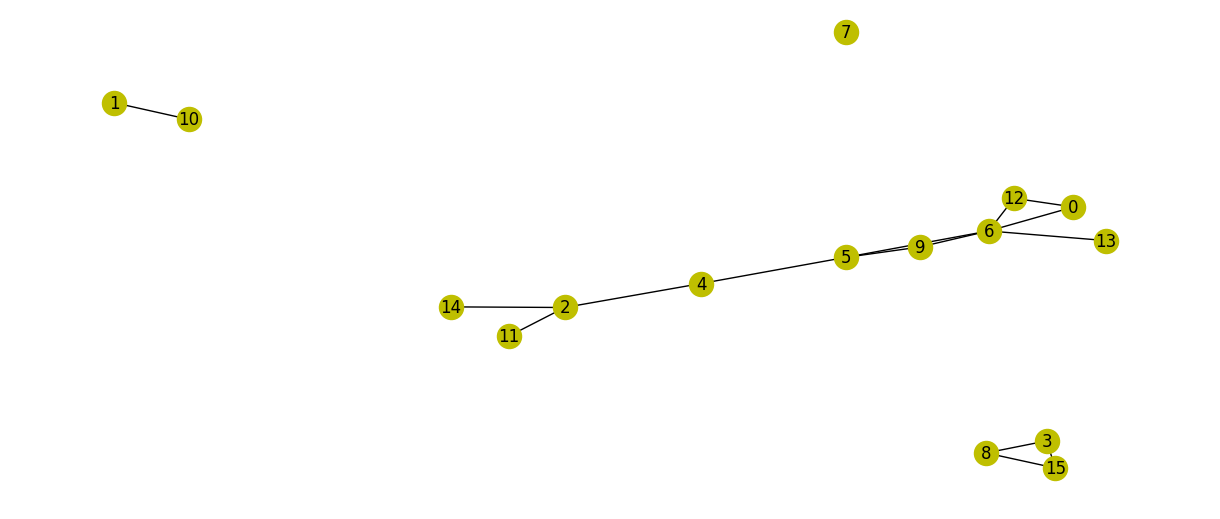

In [130]:
plt.figure(figsize=(12,5))
G = nx.gnm_random_graph(16, 15)
nx.draw(G, **opts)

## Tasks (25+5 marks)

1. Draw $2$ random graphs sampled from model $A$ with $n = 25$ nodes and $m = 40$ edges. For each graph:
  * Determine the number of triads and of triangles.
  * Determine the clustering coefficient $C$ and the transitivity $T$.


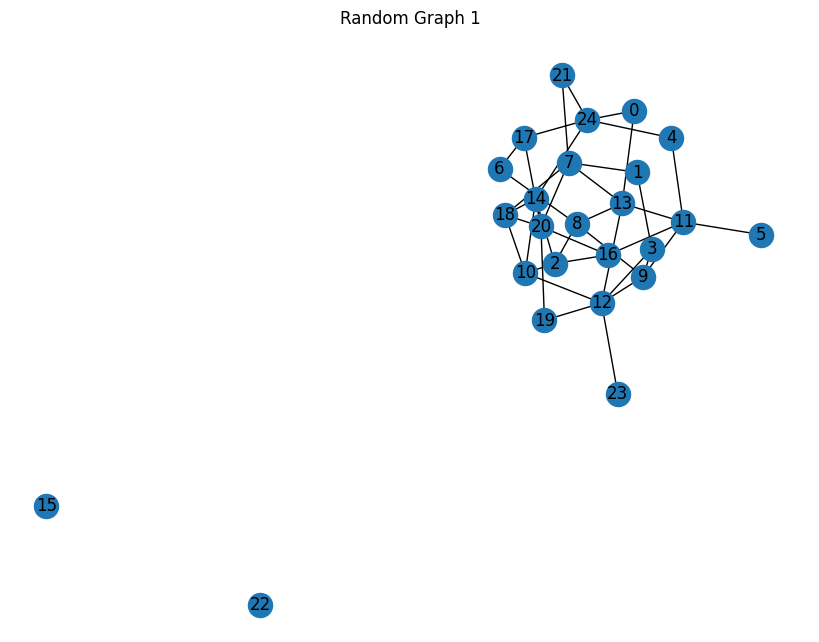

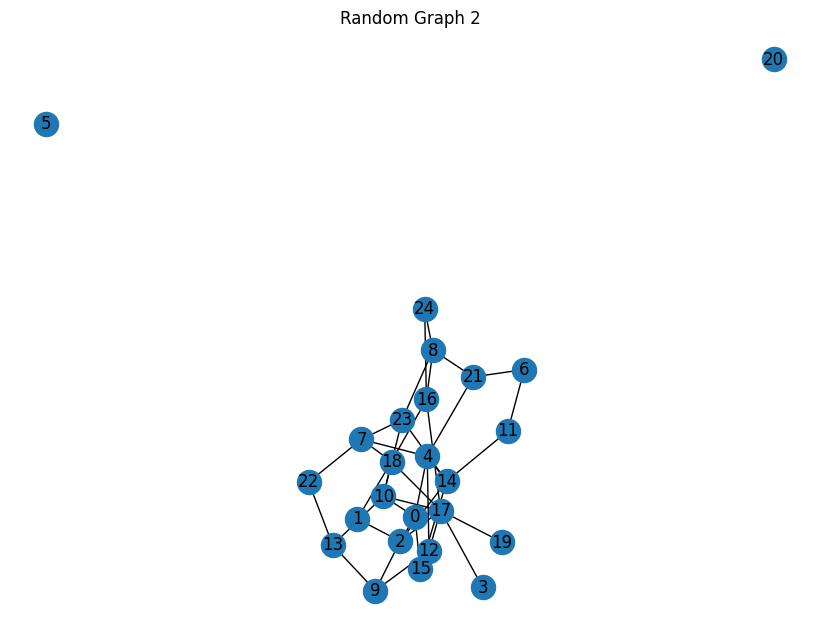

In [131]:
import networkx as nx
import matplotlib.pyplot as plt

n = 25
m = 40

# Draw the first random graph
G1 = nx.gnm_random_graph(n, m)
plt.figure(figsize=(8, 6))
nx.draw(G1, with_labels=True)
plt.title("Random Graph 1")
plt.show()

# Draw the second random graph
G2 = nx.gnm_random_graph(n, m)
plt.figure(figsize=(8, 6))
nx.draw(G2, with_labels=True)
plt.title("Random Graph 2")
plt.show()



In [132]:
# get the number of triads in G1 and G2

g1_triads = sum(k*(k-1)//2 for k in dict(G1.degree()).values())
print("G1 Triads: ", g1_triads)

g1_triangles = sum(nx.triangles(G1).values()) / 3
print("G1 Triangles: ", g1_triangles)

g2_triads = sum(k*(k-1)//2 for k in dict(G2.degree()).values())
print("G2 Triads: ", g2_triads)

g2_triangles = sum(nx.triangles(G2).values()) / 3
print("G2 Triangles: ", g2_triangles)

G1 Triads:  125
G1 Triangles:  5.0
G2 Triads:  130
G2 Triangles:  5.0


In [133]:

clustering_coefficient = nx.average_clustering(G2)
transitivity = nx.transitivity(G2)

print("Clustering coefficient of G2:", clustering_coefficient)
print("Transitivity of G2:", transitivity)


Clustering coefficient of G2: 0.0937142857142857
Transitivity of G2: 0.11538461538461539


... comments here ...

2. With $n$ and $m$ as in Task 1. above, is it possible to sample a graph that is a tree? (Justify your answer)

I know that a tree has certain properties: it is a connected graph, and it has exactly $n-1$ edges, where $n$ is the number of nodes. i.e, there is exactly one path between any two nodes.

With $n=25$ and $m=40$ as in Task 1, if the graph is a tree, the number of edges ($m$) must be exactly $n-1$. 

Our number of nodes ($n$) is 25. If this graph is a tree, the number of edges must be 24. However, $m$ is not 24, it is 40. This will inevitably introduce cycles.

Therefore, it is **not** possible, for $n=25$ and $m=40$ to sample a graph which is a tree.

## 2.  ER Model $B$

**Definition (ER Model $B$: Binomial Random Graphs).**
Let $n \geq 1$, let $N = \binom{n}{2}$ and let $0 \leq p \leq 1$.


The model $G(n, p)$ consists of the ensemble of graphs $G$
with $n$ nodes $X = \{0, 1, \dots, n{-}1\}$, and each of the $N$
possible edges chosen with probability $p$.

Model $B$ random graphs in `networkx` can be generated with the function `nx.gnp_random_graph(n, p)`,
where parameter $n$ gives the number of nodes and parameter $p \in [0, 1]$ the edge probability. For example:

#edges:  16


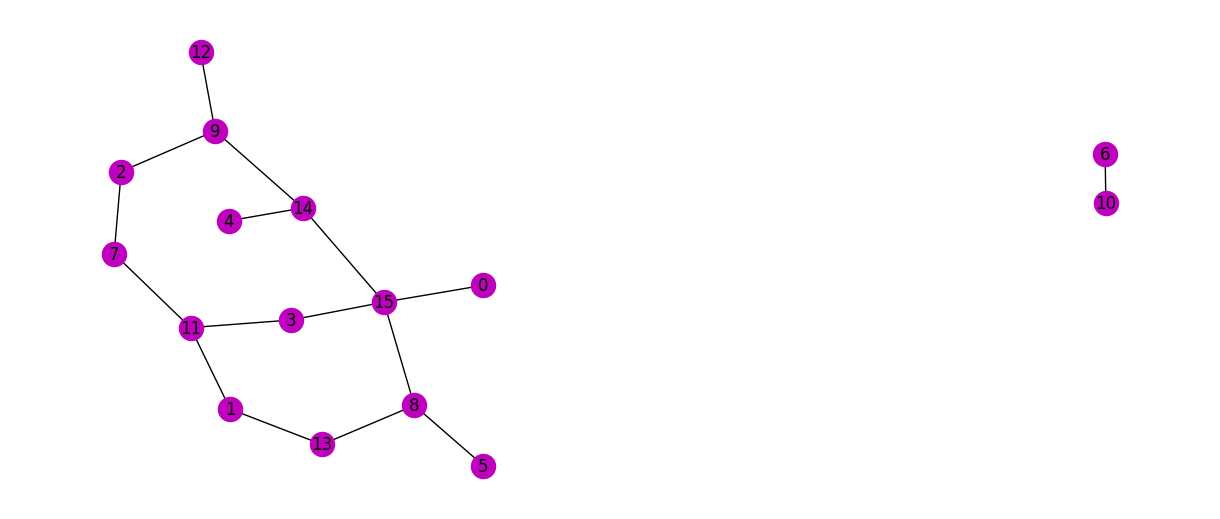

In [134]:
plt.figure(figsize=(12,5))
G = nx.gnp_random_graph(16, 0.125)
print("#edges: ", G.number_of_edges())
nx.draw(G, **opts2)

## Tasks (25+5 marks)

1. Draw $2$ random graphs sampled from model $B$ with $n = 25$ nodes and edge probability $p$ such that the _expected_ size of the graph is $40$. For each graph:
  * Determine the number of triads and of triangles.
  * Determine the clustering coefficient $C$ and the transitivity $T$.



In [135]:
### first calculate p

# Parameters
n = 25  # Number of nodes
E = 40  # Expected number of edges

# Calculate the total number of possible edges
N = n * (n - 1) / 2

# Solve for p
p = E / N

print("Probability p for expected size of 40 edges:", p)


Probability p for expected size of 40 edges: 0.13333333333333333


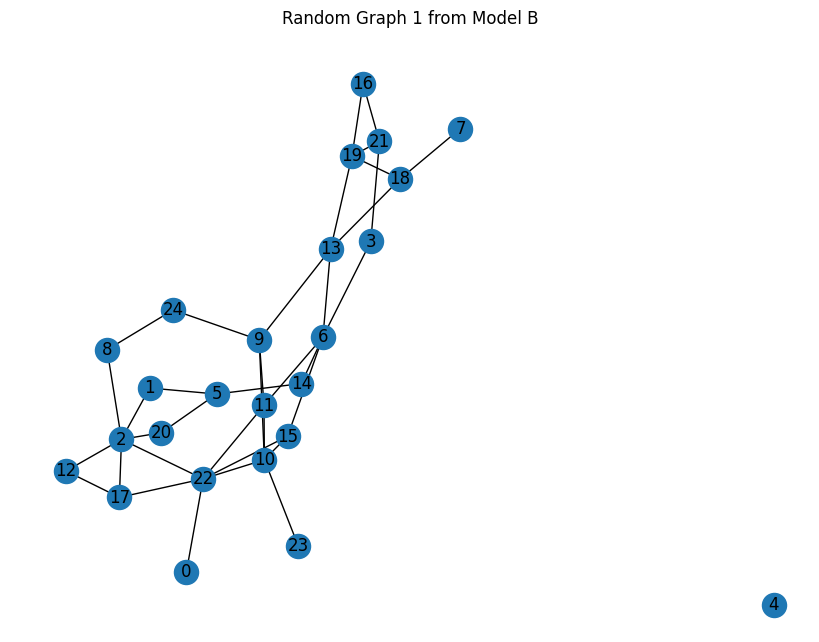

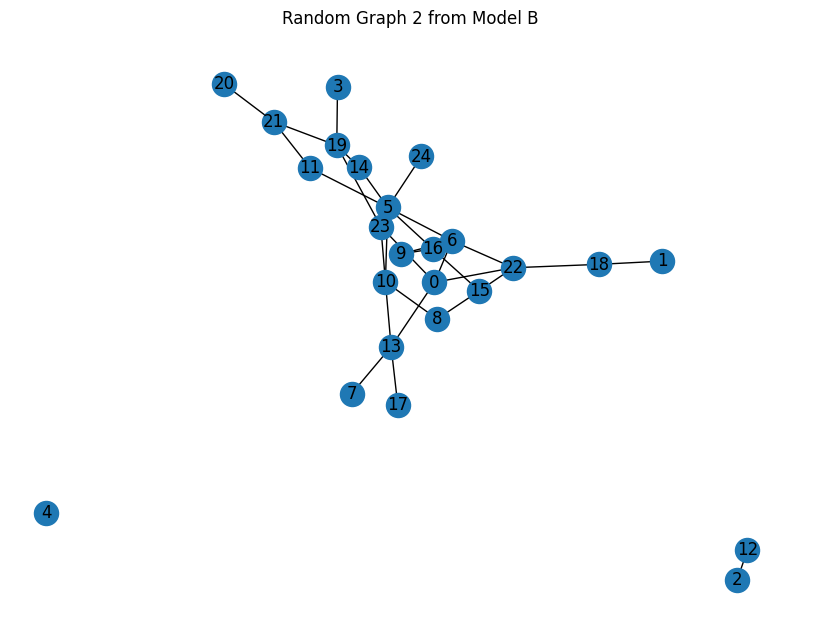

In [136]:
# Generate and draw the first random graph
G1 = nx.gnp_random_graph(n, p)
plt.figure(figsize=(8, 6))
nx.draw(G1, with_labels=True)
plt.title("Random Graph 1 from Model B")
plt.show()

# Generate and draw the second random graph
G2 = nx.gnp_random_graph(n, p)
plt.figure(figsize=(8, 6))
nx.draw(G2, with_labels=True)
plt.title("Random Graph 2 from Model B")
plt.show()

In [137]:
# get the number of triads in G1 and G2

g1_triads = sum(k*(k-1)//2 for k in dict(G1.degree()).values())
print("G1 Triads: ", g1_triads)

g1_triangles = sum(nx.triangles(G1).values()) / 3
print("G1 Triangles: ", g1_triangles)

g2_triads = sum(k*(k-1)//2 for k in dict(G2.degree()).values())
print("G2 Triads: ", g2_triads)

g2_triangles = sum(nx.triangles(G2).values()) / 3
print("G2 Triangles: ", g2_triangles)

G1 Triads:  97
G1 Triangles:  7.0
G2 Triads:  75
G2 Triangles:  3.0


In [138]:

clustering_coefficient = nx.average_clustering(G2)
transitivity = nx.transitivity(G2)

print("Clustering coefficient of G2:", clustering_coefficient)
print("Transitivity of G2:", transitivity)

Clustering coefficient of G2: 0.08133333333333333
Transitivity of G2: 0.12


... comments here...

2. With $n$ and $p$ as in Task 1. above, is it possible to sample a graph that is a tree? (Justify your answer)

Again, I know that a tree has certain properties: it is a connected graph, and it has exactly $n-1$ edges, where $n$ is the number of nodes. i.e, there is exactly one path between any two nodes.

With $n=25$ and $p=0.13333333333333333333$ as in Task 1, if the graph is a tree, the number of edges ($m$) must be exactly $n-1$. 

For a graph created in this model, each edge in $G(n,p) is chosen with probability $p$. This process is capable of generating many different types of graphs. It is possible to generate empty graphs, trees, and complete graphs from this model.

However, while it is theoretically possible to sample a graph that is a tree, the expected number of edges (which is not *certain*) is 40. It is highly unlikely to sample a graph from $G(n,p)$ which is a tree. We would have to randomly form exactly 24 edges that also happen to connect every node with no cycles.

In short, it is possible theoretically but very unlikely to happen, especially since the expected number of edges is much larger than what would be required for this graph to be a tree.

## 3. Degree Distribution

The **degree distribution** of a graph $G = (X, E)$ is the probability distribution of the node degrees of the graph $G$, i.e. the function $p \colon \mathbb{N}_0 \to \mathbb{R}$ defined by
$$
p_k = \frac{n_k}{n},
$$
where $n = |X|$ is the total number of nodes in $G$, and $n_k$ is the number of nodes of degree $k$.
(Note hat $\sum_k p_k = 1$.)

In `networkx`, the numbers $n_k$ can be determined by the function `nx.degree_histogram`.
Then `python` list comprehension can be used to compute the numbers $p_k$ from those.
And those numbers, turned into a `pandas` dataframe, can be plotted nicely and quickly.

<Axes: >

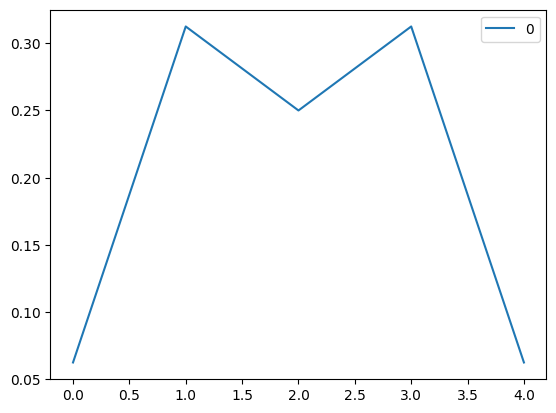

In [139]:
G = nx.gnp_random_graph(16, 0.125)
n = G.number_of_nodes()
histogram = nx.degree_histogram(G)
distribution = [x/n for x in histogram]
df = pd.DataFrame(distribution)
df.plot()

The degree distribution of a model $B$ random graph is known to follow a **binomial distribution** 
$\mathrm{Bin}(n-1, p)$ of the
form 
$$
p_k = \binom{n-1}{k} p^k (1-p)^{n-1-k}
$$

Using the formula
$$
\binom{n}{k} = \frac{n \cdot (n-1) \dotsm (n-k+1)}{1 \cdot 2 \dotsm k}
$$
in `python`, the binomial coefficient $\binom{n}{k}$ can be computed with the following function:

In [140]:
def binomial(n, k):
    prd, top, bot = 1, n, 1
    for i in range(k):
        prd = (prd * top) // bot
        top, bot = top - 1, bot + 1
    return prd

The binomial distribution $\mathrm{Bin}(n, p)$ can then be defined as: 

In [141]:
def b_dist(n, p, k):
    return binomial(n, k) * p**k * (1-p)**(n-k)

In order to compare the degree distribution of a random graph $G$ on $16$ points
to the corresponding binomial distribution, one can compute and plot the values
of $\mathrm{Bin}(16, p)$ for a suitable value of $p$, and $k$ ranging from $0$
to the highest node degree in $G$, as follows.

In [142]:
len(histogram)

5

<Axes: >

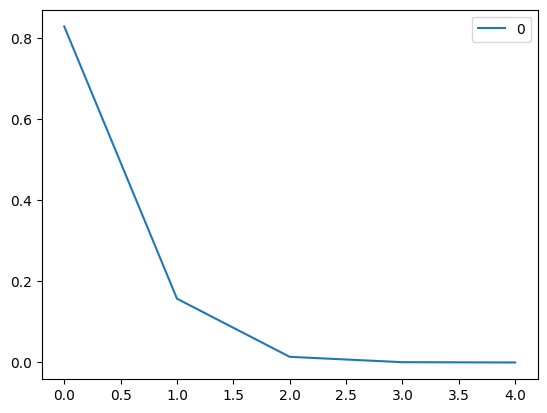

In [143]:
n, p = 16, 0.0125
bb = [b_dist(n-1, p, k) for k in range(len(histogram))]
df = pd.DataFrame(bb)
df.plot()

In the limit $n \to \infty$ (keeping the expected average degree $p (n-1)$ constant), the binomial distribution $\mathrm{Bin}(n-1, p)$ is well approximated by
the **Poisson distribution** defined by
$$
p_k = e^{-\lambda} \frac{\lambda^k}{k!},
$$
where $\lambda = p (n-1)$.

Using the functions `exp` and `factorial` from `python`'s `math` library, one can
compute the Poisson distribution with the follwing `python` function:

In [144]:
from math import exp, factorial
def p_dist(l, k):
    return exp(-l) * l**k / factorial(k)

## Tasks (40 marks)

* Create a model $B$ random graph on $n = 200$ points, 
with edge probability $p = 0.025$, and plot its degree distribution.


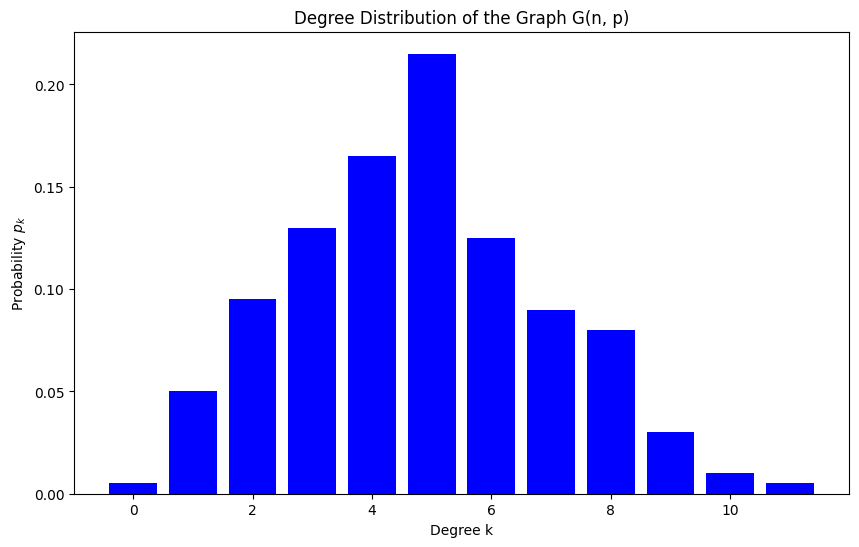

In [145]:
# Generate a G(n, p) random graph
n = 200
p = 0.025
G = nx.gnp_random_graph(n, p)

# Calculate the degree histogram
histogram = nx.degree_histogram(G)

# Convert histogram to a probability distribution
distribution = [x / n for x in histogram]

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(distribution)), distribution, width=0.8, color='b')
plt.xlabel('Degree k')
plt.ylabel('Probability $p_k$')
plt.title('Degree Distribution of the Graph G(n, p)')
plt.show()

* Create a model $B$ random graph on $n = 500$ points, 
with edge probability $p = 0.01$, and plot its degree distribution.


* Compute and plot the binomial distribution that corresponds to a random model $B$ graph
on $n = 500$ points with $p = 0.01$ and $k$ ranging from $0$
to the highest node degree in $G$.

In [146]:
# Generate a G(n, p) random graph
n = 500  # Number of nodes
p = 0.01  # Probability of edge creation
G = nx.gnp_random_graph(n, p)

# Calculate the degree histogram
histogram = nx.degree_histogram(G)

# Convert histogram to a probability distribution
distribution = [x / n for x in histogram]


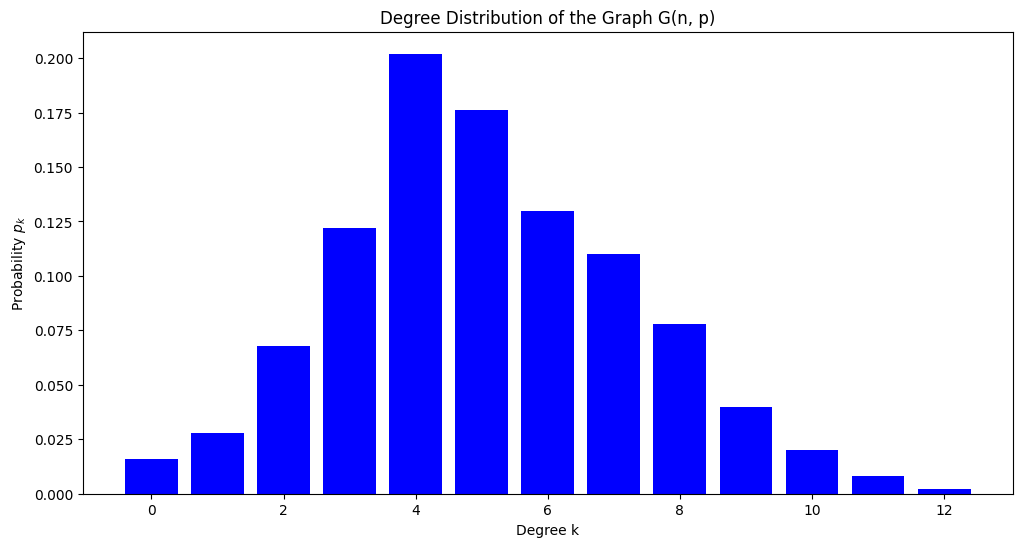

In [147]:
# Plot the degree distribution of the graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(distribution)), distribution, width=0.8, color='b')
plt.xlabel('Degree k')
plt.ylabel('Probability $p_k$')
plt.title('Degree Distribution of the Graph G(n, p)')
plt.show()

* Repeat the previous two steps on more nodes: create a model $B$ random graph on $n = 2000$ points, 
with edge probability $p = 0.0025$, and plot its degree distribution.


* Compute and plot the binomial distribution that corresponds to a random model $B$ graph
on $n = 2000$ points with $p = 0.0025$ and $k$ ranging from $0$
to the highest node degree in $G$.

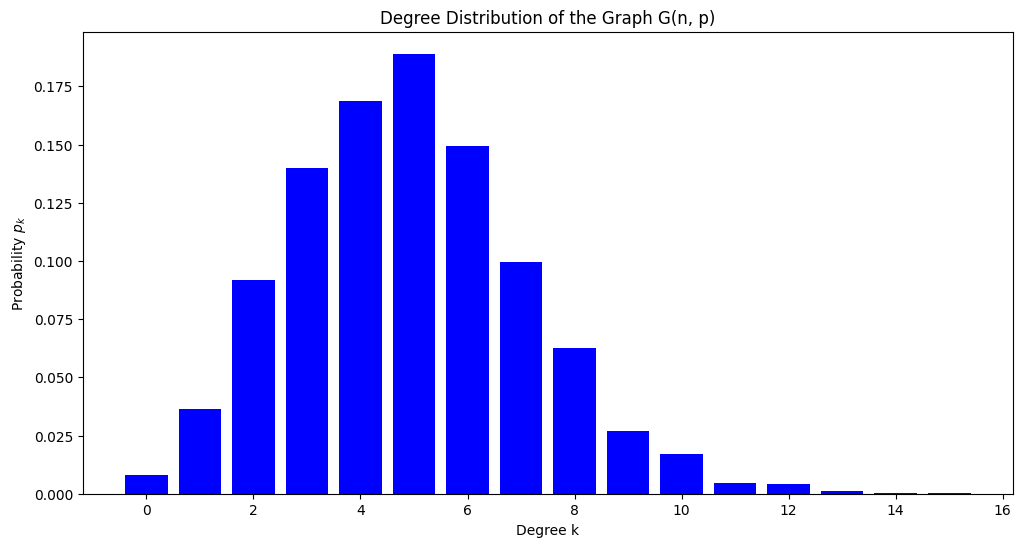

In [148]:
# Generate a G(n, p) random graph
n = 2000
p = 0.0025
G = nx.gnp_random_graph(n, p)

# Calculate the degree histogram
histogram = nx.degree_histogram(G)

# Convert histogram to a probability distribution
distribution = [x / n for x in histogram]

# Plot the degree distribution of the graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(distribution)), distribution, width=0.8, color='b')
plt.xlabel('Degree k')
plt.ylabel('Probability $p_k$')
plt.title('Degree Distribution of the Graph G(n, p)')
plt.show()


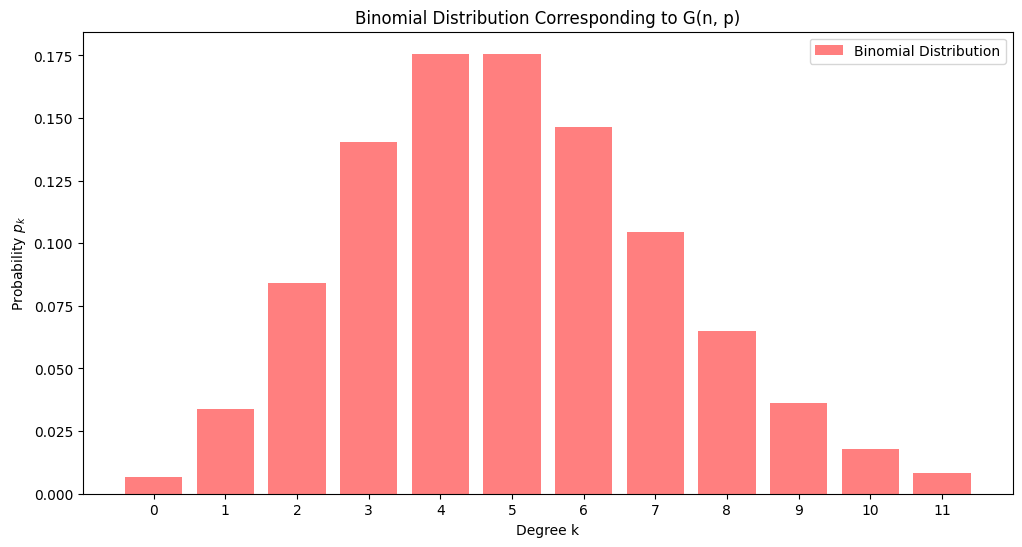

In [151]:
from scipy.special import comb
import numpy as np

def b_dist(n, p, k):
    # Using comb for binomial coefficient calculation
    return comb(n-1, k) * p**k * (1-p)**(n-1-k)

# Compute the theoretical binomial distribution
k_values = range(len(histogram))
bb = [b_dist(n-1, p, k) for k in k_values]

# Plot the binomial distribution
plt.figure(figsize=(12, 6))
plt.bar(k_values, bb, width=0.8, color='r', alpha=0.5, label='Binomial Distribution')
plt.xlabel('Degree k')
plt.ylabel('Probability $p_k$')
plt.title('Binomial Distribution Corresponding to G(n, p)')
plt.legend()
plt.show()


* Now compute and plot the Poisson distribution that corresponds to a random model $B$ graph
on $n = 2000$ points with $p = 0.0025$.

* Compare the plots you obtained: why do some of them show similar profiles? 

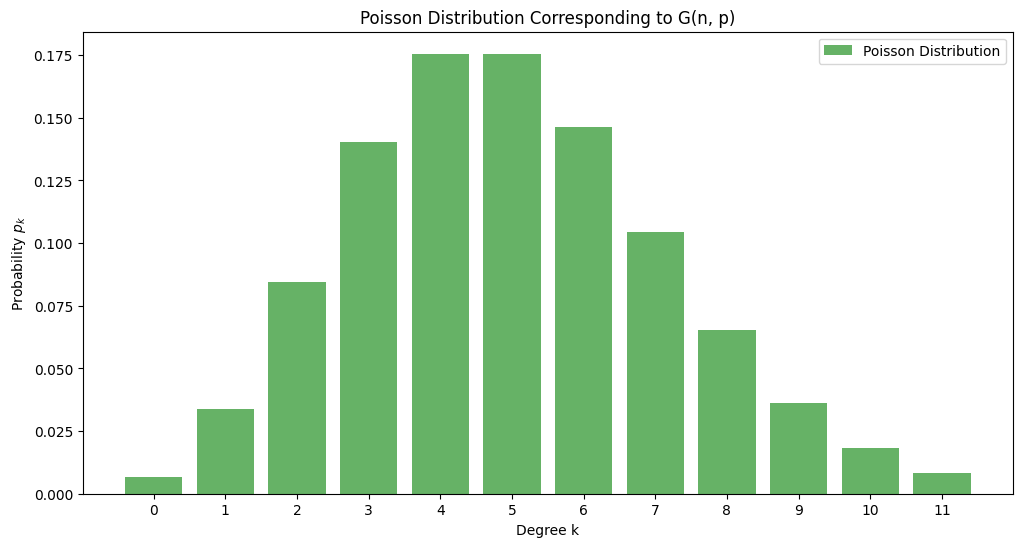

In [150]:
import matplotlib.pyplot as plt
from math import exp, factorial

# Parameters
n = 2000
p = 0.0025
lambda_ = p * (n - 1)

# Function to compute Poisson probability
def p_dist(l, k):
    return exp(-l) * l**k / factorial(k)

# calculate probabilities for k ranging from 0 to a number larger than lambda
k_max = int(lambda_ + 3*(lambda_**0.5))
poisson_distribution = [p_dist(lambda_, k) for k in range(k_max + 1)]

# Plot the Poisson distribution
plt.figure(figsize=(12, 6))
plt.bar(range(k_max + 1), poisson_distribution, width=0.8, color='green', alpha=0.6, label='Poisson Distribution')
plt.xlabel('Degree k')
plt.ylabel('Probability $p_k$')
plt.title('Poisson Distribution Corresponding to G(n, p)')
plt.xticks(range(0, k_max + 1, max(1, k_max // 10)))
plt.legend()
plt.show()


Both of the plots show similar profiles because they are probability distributions which model the occurance of events that have a fixed probability.

The binomial distribution is the exact distribution for the degree of a node in an ER model B random graph, when n and p are finite. It calculates the probability of having k edges in n-1 Bernoulli trials, with success probability p.

The poisson distribution can be used when n is large and p is small, but the expected number of k is moderate. It simplifies the calculation and is more suitable/efficient for large values of n.

Both of these plots are similar because they share a consistent relationship. Both plots display the probability of node degrees from 0 up to the maximum observed degree, and decreasing on the other side. They both display a graph that is slightly more skewed to the left.